In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# X: X koordinatı (1 - 9) - Yangının yerini belirler.
# Y: Y koordinatı (2 - 9) - Yangının yerini belirler.
# month: Ay bilgisi (Ocak - Aralık) - Yangının meydana geldiği ay.
# day: Gün bilgisi (Pzt, Salı, Çarş, Perş, Cuma, Cmt, Pzr) - Yangının meydana geldiği gün.
# FFMC: Fine Fuel Moisture Code (FFMC) - İnce yakıt nemlilik kodu, yangının başlaması ve yayılması için kritik olan kuru ince yakıtların (örneğin, yapraklar, iğne yapraklar) nem seviyesini ifade eder. Değer aralığı 0 - 100.
# DMC: Duff Moisture Code (DMC) - Karışık organik madde nemlilik kodu, orta derinlikteki organik maddenin nem seviyesini belirtir. Değer aralığı 0 - 100.
# DC: Drought Code (DC) - Kuraklık kodu, kalın organik maddenin nem seviyesini ifade eder. Yüksek değerler uzun süreli kuraklıkları belirtir. Değer aralığı 0 - 800.
# ISI: Initial Spread Index (ISI) - Başlangıç yayılma indeksi, yangının ilk aşamalarda yayılma hızını tahmin eder. Değer aralığı 0 - 100.
# temp: Sıcaklık (°C) - Yangının meydana geldiği andaki hava sıcaklığı.
# RH: Bağıl Nem (%) - Havadaki nem miktarını ifade eder.
# wind: Rüzgar hızı (km/h) - Yangının yayıldığı andaki rüzgar hızı.
# rain: Yağış miktarı (mm/m²) - Yangının meydana geldiği andaki yağış miktarı.
# area: Yanan alan (hektar cinsinden) - Yangının yaktığı toplam alan.


In [4]:
data= pd.read_csv('forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
print(data.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


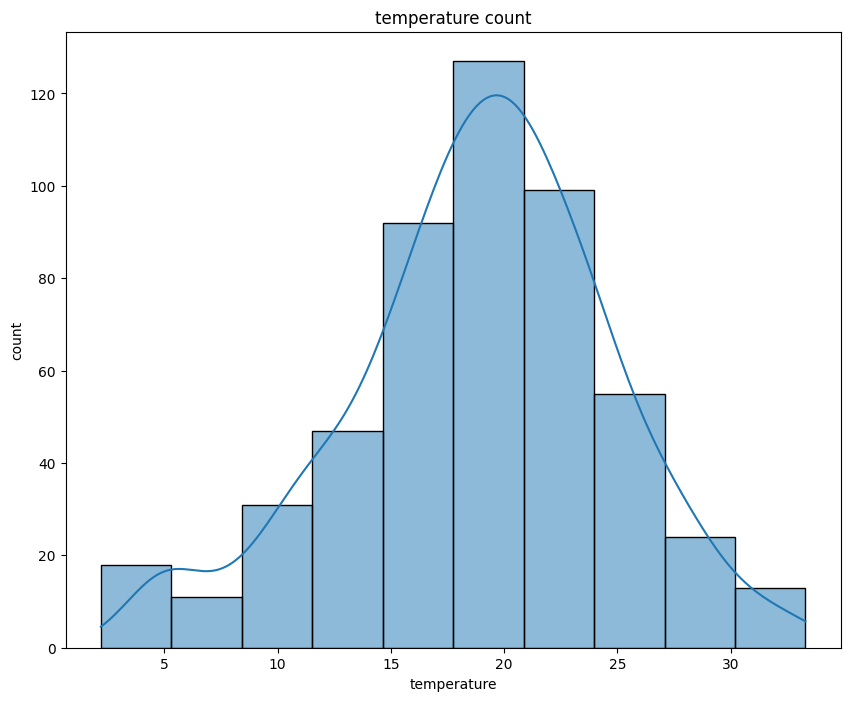

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


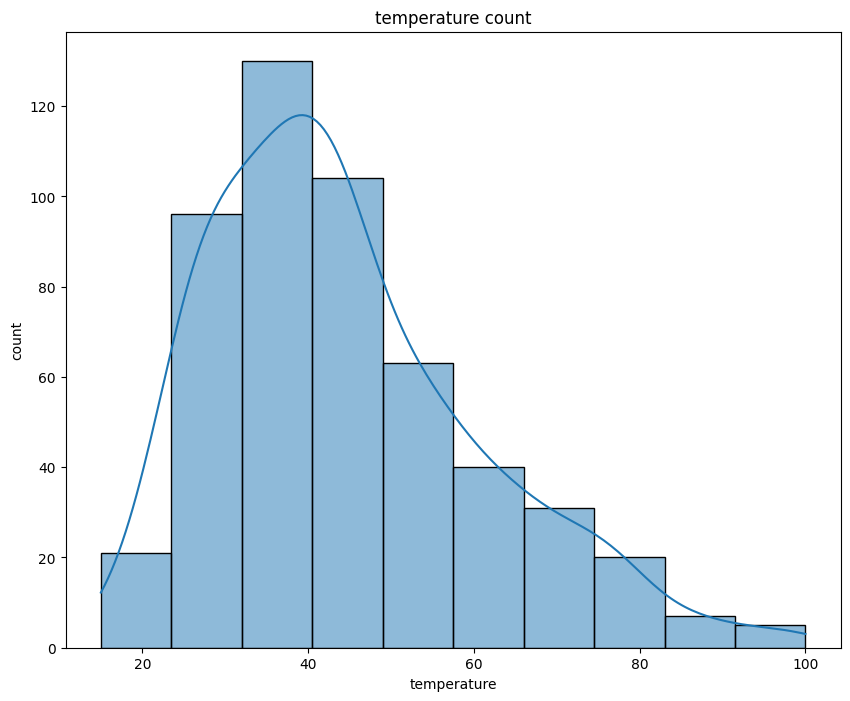

In [7]:
#vissualization
plt.figure(figsize=(10,8))
sns.histplot(data['temp'],bins= 10, kde=True)
plt.title('temperature count')
plt.xlabel('temperature')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(10,8))
sns.histplot(data['RH'],bins= 10, kde=True)
plt.title('temperature count')
plt.xlabel('temperature')
plt.ylabel('count')
plt.show()

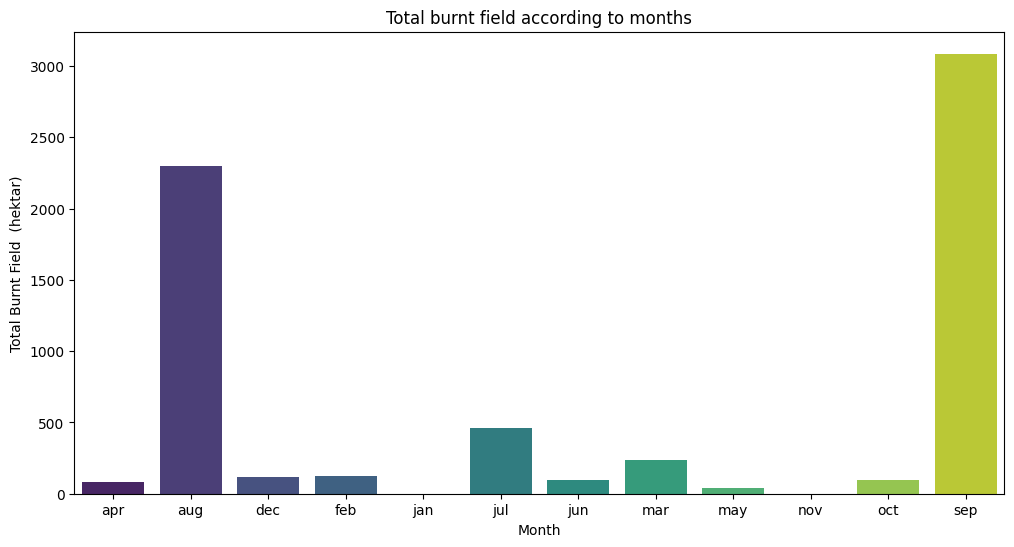

In [8]:
# total burnt field according to months
monthly_area = data.groupby('month')['area'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='area', data=monthly_area,palette='viridis' )
plt.title('Total burnt field according to months')
plt.xlabel('Month')
plt.ylabel('Total Burnt Field  (hektar)')
plt.show()

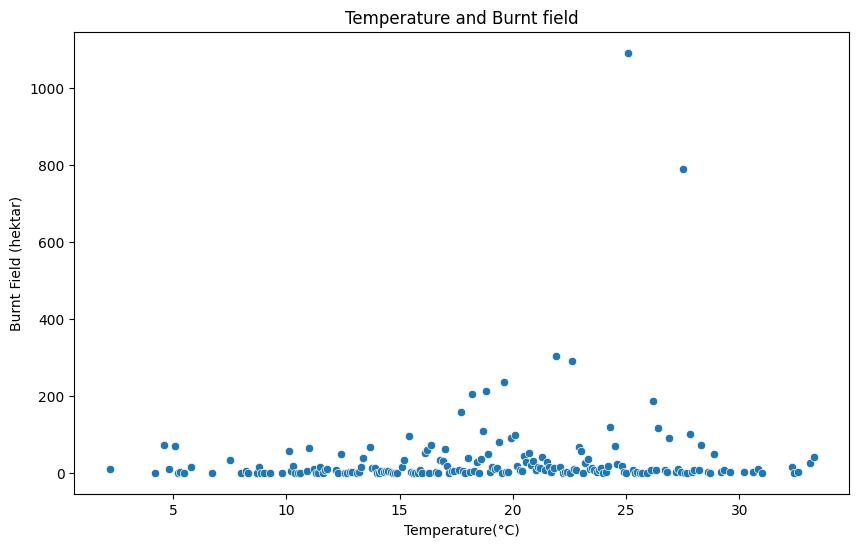

In [9]:
temp_area = data.groupby('temp')['area'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='area', data=temp_area)
plt.title('Temperature and Burnt field')
plt.xlabel('Temperature(°C)')
plt.ylabel('Burnt Field (hektar)')
plt.show()

            RH      wind      temp      area
RH    1.000000  0.069410 -0.527390 -0.075519
wind  0.069410  1.000000 -0.227116  0.012317
temp -0.527390 -0.227116  1.000000  0.097844
area -0.075519  0.012317  0.097844  1.000000


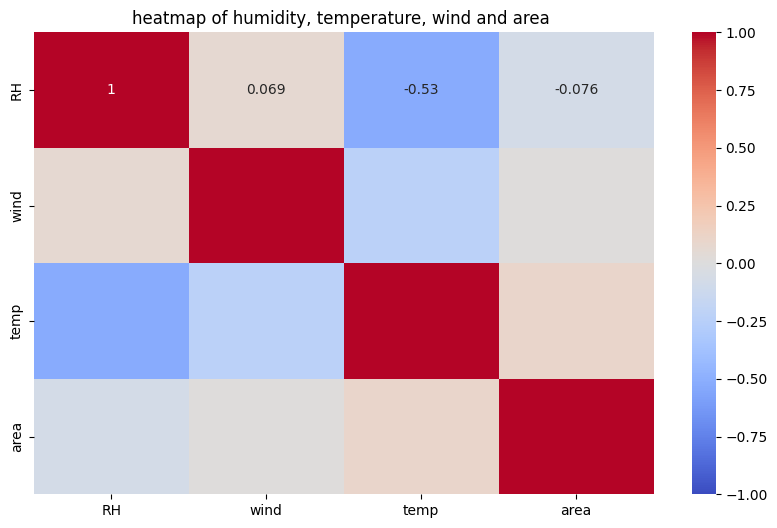

In [10]:
# select needed variables
variables = data[['RH', 'wind', 'temp', 'area']]

# calculate korelasion
corr_matrix = variables.corr()

# view corelation
print(corr_matrix)

# draw heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('heatmap of humidity, temperature, wind and area ')
plt.show()

In [11]:
#MODELS
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ay ve gün değişkenlerini sayısal değerlere çevirelim
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}

data['month'] = data['month'].map(month_mapping)
data['day'] = data['day'].map(day_mapping)

# needed columns
features = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X = data[features]
y = data['area']

# Log conversaiton
y = np.log1p(y)

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#Model linear, Lasso, Ridge Regression, Random Forest and XGBoost

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

#Models
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso Regression' : Lasso(),
    'Ridge Regression' : Ridge(),
    'Random Forest' : RandomForestRegressor(),
    'XGBoost' : xgb.XGBRegressor()
}

#model train and evalute performance
results = {}
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2= r2_score(y_test,y_pred)
    results[name] = {'RMSE' : rmse, 'R^2': r2}

#show results
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics['RMSE']:.4g}, R^2 = {metrics['R^2']:.4f}" )
    

Linear Regression: RMSE = 1.467, R^2 = 0.0205
Lasso Regression: RMSE = 1.483, R^2 = -0.0006
Ridge Regression: RMSE = 1.467, R^2 = 0.0204
Random Forest: RMSE = 1.527, R^2 = -0.0615
XGBoost: RMSE = 1.637, R^2 = -0.2193


In [13]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


ridge = Ridge()

# Hiperparametre 
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000]
}

# find best hyperparametre with grid search
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_ridge.fit(X_train, y_train)

# En iyi parametrelerle modeli tekrar eğitelim
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

# Modelin performansını değerlendirelim
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Tuned Ridge Regression: RMSE = {rmse_ridge:.4f}, R^2 = {r2_ridge:.4f}")
print("Best Ridge alpha:", grid_search_ridge.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuned Ridge Regression: RMSE = 1.4758, R^2 = 0.0090
Best Ridge alpha: {'alpha': 1000}
